In [1]:
import sys
sys.path.append('../scripts')

import numpy as np
import pandas as pd

from yahoo_stock_data import YahooStockData
from data_handler import DataHandler
from arma import AlgoARMA

In [2]:
START_DATE = '2000-01-01'
TARGET     = 'High'
TIMEFRAME  = -1
LOG_RETURN = True
TEST_SIZE  = 0.2

ticker_list = ['MSFT']

si_from_yahoo = YahooStockData(ticker_list[0])
si_data = si_from_yahoo.get_data(START_DATE)
si_data.reset_index(inplace=True)
# si_data.to_csv('MSFT.csv', index=False)
# si_data = pd.read_csv('MSFT.csv')

In [3]:
data_handler = DataHandler(si_data, TARGET, TIMEFRAME, LOG_RETURN, TEST_SIZE)
algo_arma = AlgoARMA(data_handler.y_train, 2, 0, 1)
forecasts = algo_arma.get_forecasts(len(data_handler.y_val) + len(data_handler.y_test))

/home/shiv/anaconda3/envs/ts3_9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/shiv/anaconda3/envs/ts3_9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/shiv/anaconda3/envs/ts3_9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/shiv/anaconda3/envs/ts3_9/lib/python3.9/site-packages/statsmodels/base/model.py:604: Con

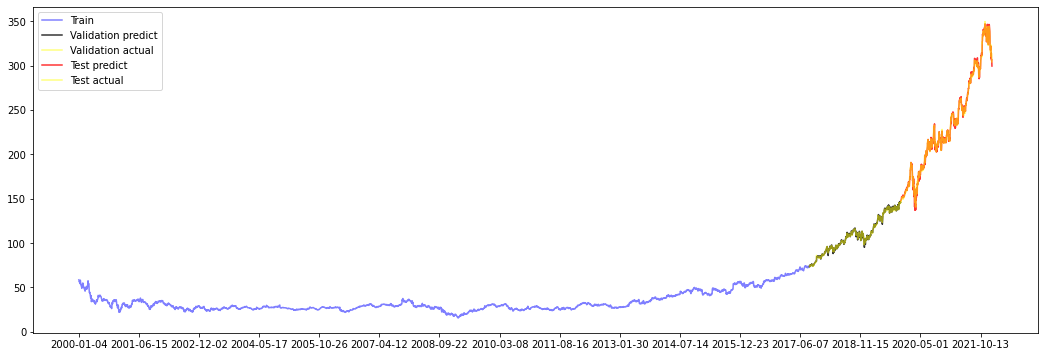


Predicted value: 299.4167994611721


,mse,mae,rmse,mape
Test Results,9.995581,2.287883,3.161579,0.010427


In [11]:
forecast, val_results, test_results = data_handler.process_forecasts(forecasts)
print()
print("Predicted value:", forecast[-1])
pd.DataFrame(test_results, index=['Test Results'])